<a href="https://colab.research.google.com/github/KIMssy/Basic-statistics-programming/blob/main/moving_average_Employment_by_industry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
data = pd.read_csv('/content/Employment.csv',sep=',',encoding='euc-kr')

In [12]:
print(data)

          시점  total  education
0   2013. 01  24287       1710
1   2013. 02  24215       1681
2   2013. 03  24736       1716
3   2013. 04  25322       1745
4   2013. 05  25610       1774
..       ...    ...        ...
91  2020. 08  27085       1793
92  2020. 09  27012       1768
93  2020. 10  27088       1772
94  2020. 11  27241       1785
95  2020. 12  26526       1777

[96 rows x 3 columns]


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   시점         96 non-null     object
 1   total      96 non-null     int64 
 2   education  96 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.4+ KB


In [14]:
def get_employment(i):
    z = data['education'][i]  
    return z

In [15]:
def mov_avg_filter(x_n, x_meas):
    """Calculate average sonar using a moving average filter (batch expression)."""
    n = len(x_n)
    for i in range(n-1): #인덱스는 0에서부터 시작하기 때문에 n-1을 해야함
      x_n[i] = x_n[i+1]
      x_n[n-1] = x_meas
      x_avg = np.mean(x_n)

    return x_avg, x_n

    #이동평균필터

In [16]:
len(data)

96

In [17]:
#input paramoters

n_samples = 96 #n_sample은 그대로, 데이터 갯수여서

n=10
time_end = 10

In [18]:
dt = time_end / n_samples
time = np.arange(0, time_end, dt)
x_meas_save = np.zeros(n_samples)
x_avg_save = np.zeros(n_samples)

In [19]:
print(time)
print(x_meas_save)
print(x_avg_save)

[0.         0.10416667 0.20833333 0.3125     0.41666667 0.52083333
 0.625      0.72916667 0.83333333 0.9375     1.04166667 1.14583333
 1.25       1.35416667 1.45833333 1.5625     1.66666667 1.77083333
 1.875      1.97916667 2.08333333 2.1875     2.29166667 2.39583333
 2.5        2.60416667 2.70833333 2.8125     2.91666667 3.02083333
 3.125      3.22916667 3.33333333 3.4375     3.54166667 3.64583333
 3.75       3.85416667 3.95833333 4.0625     4.16666667 4.27083333
 4.375      4.47916667 4.58333333 4.6875     4.79166667 4.89583333
 5.         5.10416667 5.20833333 5.3125     5.41666667 5.52083333
 5.625      5.72916667 5.83333333 5.9375     6.04166667 6.14583333
 6.25       6.35416667 6.45833333 6.5625     6.66666667 6.77083333
 6.875      6.97916667 7.08333333 7.1875     7.29166667 7.39583333
 7.5        7.60416667 7.70833333 7.8125     7.91666667 8.02083333
 8.125      8.22916667 8.33333333 8.4375     8.54166667 8.64583333
 8.75       8.85416667 8.95833333 9.0625     9.16666667 9.2708

In [20]:
for i in range(n_samples):
  x_meas = get_employment(i)
  if i == 0:
      x_avg, x_n = x_meas, x_meas * np.ones(n)  #x_meas * np.ones(n):배열이다 / 값이 얼마인지 보기 /x_meas * np.ones(n):의미파악 중요
      print(x_meas * np.ones(n))
  else:
    x_avg, x_n = mov_avg_filter(x_n, x_meas)
    print(x_n)
  x_meas_save[i] = x_meas
  x_avg_save[i] = x_avg

[1710. 1710. 1710. 1710. 1710. 1710. 1710. 1710. 1710. 1710.]
[1710. 1710. 1710. 1710. 1710. 1710. 1710. 1710. 1681. 1681.]
[1710. 1710. 1710. 1710. 1710. 1710. 1710. 1681. 1716. 1716.]
[1710. 1710. 1710. 1710. 1710. 1710. 1681. 1716. 1745. 1745.]
[1710. 1710. 1710. 1710. 1710. 1681. 1716. 1745. 1774. 1774.]
[1710. 1710. 1710. 1710. 1681. 1716. 1745. 1774. 1786. 1786.]
[1710. 1710. 1710. 1681. 1716. 1745. 1774. 1786. 1813. 1813.]
[1710. 1710. 1681. 1716. 1745. 1774. 1786. 1813. 1811. 1811.]
[1710. 1681. 1716. 1745. 1774. 1786. 1813. 1811. 1794. 1794.]
[1681. 1716. 1745. 1774. 1786. 1813. 1811. 1794. 1790. 1790.]
[1716. 1745. 1774. 1786. 1813. 1811. 1794. 1790. 1793. 1793.]
[1745. 1774. 1786. 1813. 1811. 1794. 1790. 1793. 1779. 1779.]
[1774. 1786. 1813. 1811. 1794. 1790. 1793. 1779. 1748. 1748.]
[1786. 1813. 1811. 1794. 1790. 1793. 1779. 1748. 1786. 1786.]
[1813. 1811. 1794. 1790. 1793. 1779. 1748. 1786. 1814. 1814.]
[1811. 1794. 1790. 1793. 1779. 1748. 1786. 1814. 1837. 1837.]
[1794. 1

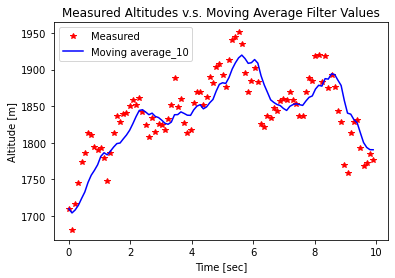

In [21]:
plt.plot(time, x_meas_save, 'r*', label='Measured')
plt.plot(time, x_avg_save, 'b-', label='Moving average_10')
plt.legend(loc='upper left')
plt.title('Measured Altitudes v.s. Moving Average Filter Values')
plt.xlabel('Time [sec]')
plt.ylabel('Altitude [m]')
plt.savefig('/content/png')